In [337]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import time

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [338]:
#input layer (4 features)
#-> hidden layer 1 (8)
#-> hidden layer 2 (9)
#-> output (3 classes)

class Model(nn.Module):
    def __init__(self,in_features=4, h1=8, h2=9, out_features=3):
        super().__init__() #instanciate NN.module
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
    
        return x

In [339]:
#I tried overfitting the model with overly complex model

class OverfitModel(nn.Module):
    def __init__(self,in_features=4, h1=128, h2=128, h3=128, out_features=3):
        super().__init__() #instanciate NN.module
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,h3)
        self.out = nn.Linear(h3,out_features)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)
    
        return x

In [340]:
#seed
torch.manual_seed(42)
#model instance
model = Model()
# model = OverfitModel()

In [341]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [342]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) #it would be better to do split train set into training and eval to adjust param

In [343]:
x_train.shape, y_train.shape

((120, 4), (120,))

In [344]:
x_train,x_test = torch.FloatTensor(x_train),torch.FloatTensor(x_test)

In [345]:
y_train,y_test = torch.LongTensor(y_train),torch.LongTensor(y_test)

In [346]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.005) #0.001 for overfit model

In [347]:
epochs = 200 #20000 for overfit
losses = []
start_time = time.time()
for i in range(epochs):
    y_pred = model.forward(x_train) #forward propagation and get a prediction
    loss = criterion(y_pred,y_train) #predicted values vs y_train
    losses.append(loss.detach().numpy()) #keep track of losses
    if i % 10 == 0:
        print(f'Epoch: {i} | Loss: {loss}')

    #backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
end_time = time.time()
print(f"Time: {end_time-start_time:.5f}s, Loss: {loss}')")

Epoch: 0 | Loss: 1.0846974849700928
Epoch: 10 | Loss: 0.909690260887146
Epoch: 20 | Loss: 0.7275701761245728
Epoch: 30 | Loss: 0.5119953751564026
Epoch: 40 | Loss: 0.31572046875953674
Epoch: 50 | Loss: 0.14469553530216217
Epoch: 60 | Loss: 0.07779555022716522
Epoch: 70 | Loss: 0.06435727328062057
Epoch: 80 | Loss: 0.06133686751127243
Epoch: 90 | Loss: 0.060605812817811966
Epoch: 100 | Loss: 0.06080344691872597
Epoch: 110 | Loss: 0.061322811990976334
Epoch: 120 | Loss: 0.06171952188014984
Epoch: 130 | Loss: 0.0618630051612854
Epoch: 140 | Loss: 0.061791811138391495
Epoch: 150 | Loss: 0.061664048582315445
Epoch: 160 | Loss: 0.06143493577837944
Epoch: 170 | Loss: 0.06119073927402496
Epoch: 180 | Loss: 0.06106628105044365
Epoch: 190 | Loss: 0.061030901968479156
Time: 0.28700s, Loss: 0.061288271099328995')


Text(0.5, 0, 'epoch')

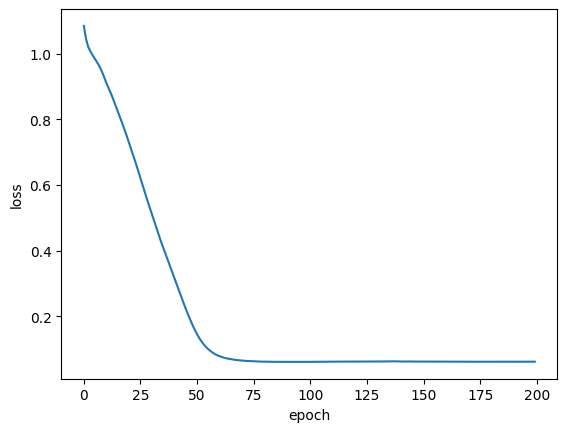

In [348]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epoch')

In [349]:
# dataset = TensorDataset(x_train,y_train)
# train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [350]:
# epochs = 125
# losses = []
# start_time = time.time()
# for i in range(epochs):
#     for xb, yb in train_loader:
#         y_pred = model(xb) #forward propagation and get a prediction
#         loss = criterion(y_pred,yb) #predicted values vs y_train
#         losses.append(loss.item()) #keep track of losses
#         print(f'Epoch: {i} | Loss: {loss}')

#         #backpropagation
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
# end_time = time.time()
# print(f"Time: {end_time-start_time:.5f}s")

In [351]:
# plt.plot([i for i in range(500)],losses)
# plt.ylabel('loss')
# plt.xlabel('epoch')

In [352]:
with torch.no_grad():    
    y_forloss = model.forward(x_test)
    loss = criterion(y_forloss, y_forloss)

In [353]:
loss #quite close to test set error

tensor(-101.1286)

In [356]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(x_test):
        y_forloss = model.forward(data)

        print(f'{i+1}.) {str(y_forloss)} {y_test[i]}')

        if y_forloss.argmax().item() == y_test[i]:
            correct += 1

print(correct)

1.) tensor([-2.2105,  4.9802,  0.5863]) 1
2.) tensor([  9.8291,   3.3384, -11.9940]) 0
3.) tensor([-9.3269, -0.3302, 10.8624]) 2
4.) tensor([-2.4230,  4.4904,  1.0373]) 1
5.) tensor([-2.5261,  5.2121,  0.8293]) 1
6.) tensor([  9.0481,   3.1517, -11.0485]) 0
7.) tensor([ 0.1964,  4.9499, -2.0779]) 1
8.) tensor([-5.2252,  2.5037,  5.0319]) 2
9.) tensor([-3.7013,  3.3640,  2.9671]) 1
10.) tensor([-0.6448,  5.3028, -1.3215]) 1
11.) tensor([-4.4544,  3.0481,  3.9352]) 2
12.) tensor([  8.7119,   2.8960, -10.5674]) 0
13.) tensor([ 10.0673,   3.1588, -12.1359]) 0
14.) tensor([  8.7913,   2.9633, -10.6943]) 0
15.) tensor([  9.7092,   3.0091, -11.6720]) 0
16.) tensor([-2.1957,  5.0399,  0.5346]) 1
17.) tensor([-7.1586,  0.6243,  8.0226]) 2
18.) tensor([-0.9120,  5.1946, -0.9729]) 1
19.) tensor([-2.2741,  4.4611,  0.8888]) 1
20.) tensor([-7.0543,  0.5074,  7.9604]) 2
21.) tensor([  8.3690,   2.9092, -10.2004]) 0
22.) tensor([-4.0598,  3.0724,  3.4895]) 2
23.) tensor([  8.5001,   3.0261, -10.3856]

In [357]:
new_data = torch.tensor([4.7,3.2,1.3,0.2])
with torch.no_grad():
    print(model(new_data))

tensor([  8.9298,   2.8073, -10.7337])
